#3. Free fall with air resistance: *solving a 2nd order ODE*
=========
The motion of an object falling under the influence of gravity and air resistance can be modeled
by the following second-order ODE:
\begin{equation} 
m\frac{d^2x}{dt^2} = mg - c(\frac{dx}{dt})^2
\end{equation}

where m = 70 kg is the mass of the object, $g = 9.81 \, m/s^2$
is the gravitational acceleration, and c = 0.25
kg/m is the drag coefficient.
* Converting the 2nd order ODE is a system of two 1st order ODEs, write a Python script to solve the
system of ODEs using the ***Euler*** and/or ***Runge-Kutta (RK4)*** methods. Use initial conditions
$x(0) = 0 m$ and $v(0) = 0 m/s$ for an object starting from rest.
* Plot the position $x(t)$ and velocity $v(t)$ of the object over time.
* Analyze the terminal velocity $v_{term}$ and how the solution behaves when air resistance becomes
significant

In [25]:
## Imports
import numpy as np ## Numpy
import matplotlib.pyplot as plt ## Matplotlib: to plot the result

\begin{gather}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = g - \frac{cv^2}{m}
\end{gather}


In [ ]:
#define constants and functions
m = 70
g = 9.81
c = 0.25
start_x = 0
start_v = 0
trg_x = 20
step = 0.01
f1 = lambda x, v : v
f2 = lambda x, v : g - ((c*(v**2))/m)

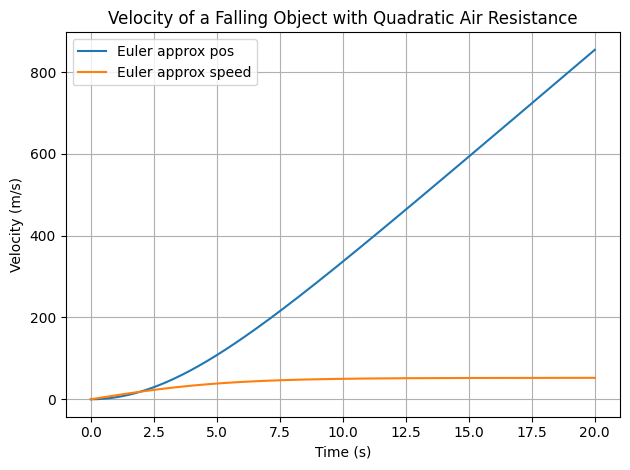

In [ ]:
def euler(x, v, step, func):
    return step * func(x, v)

def iter_over_euler(step, t_array):
    x_array = []
    v_array = []
    current_x = start_x
    current_v = start_v
    for t in t_array:
        x_array.append(current_x)
        v_array.append(current_v)

        tmp_x = current_x + euler(current_x, current_v, step, f1)
        current_v += euler(current_x, current_v, step, f2)
        current_x = tmp_x #Calculating v needs the use of "the previous x"

    return x_array, v_array

t_array = np.arange(start_x, trg_x + step, step)
plt.plot(t_array, iter_over_euler(step, t_array)[0], label="Euler approx pos")  
plt.plot(t_array, iter_over_euler(step, t_array)[1], label="Euler approx speed")  

plt.title("Velocity of a Falling Object with Quadratic Air Resistance")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()  

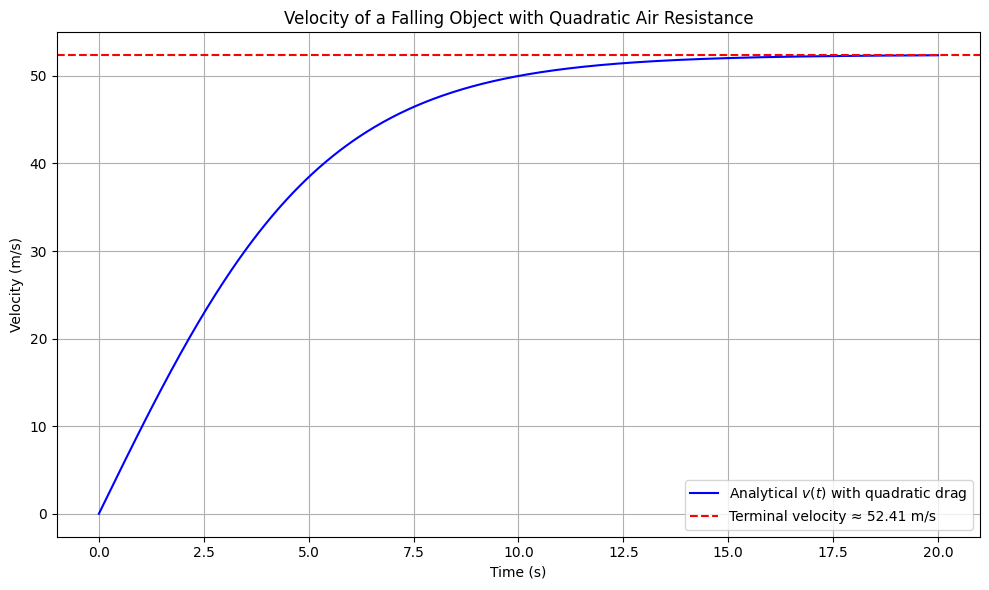

In [28]:
# Constants
m = 70        # mass in kg
k = 0.25      # air resistance coefficient (quadratic)
g = 9.81      # gravity (m/s^2)
v0 = 0        # initial velocity
t = np.linspace(0, 20, 500)  # time array from 0 to 20 seconds

# Terminal velocity
v_T = np.sqrt(m * g / k)
lambda_ = k / m

# Analytical solution for v(t)
v_t = v_T * np.tanh(lambda_ * v_T * t + np.arctanh(v0 / v_T))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, v_t, label='Analytical $v(t)$ with quadratic drag', color='blue')
plt.axhline(v_T, color='red', linestyle='--', label=f'Terminal velocity ≈ {v_T:.2f} m/s')
plt.title("Velocity of a Falling Object with Quadratic Air Resistance")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
